# Scatterplot for Figure 3 
These require the data so have to be run within each cohort separately. The output Figures will then be included in Figure 3 (A and B).

In [2]:
# data storage and handling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string 

# ignore warnings  
import warnings
warnings.filterwarnings('ignore')

In [1]:
PATH_OG = '/Users/Serena/Desktop/mockData/Results/original_sample.csv' # <== fill in the path to the original_sample.csv file
cohort = "ALSPAC"                          # <== fill in "ALSPAC" or "GenR"
output_path = "/Users/Serena/Desktop/"         # <== fill this in. Where do you want the figures to be saved.

In [3]:
# ============================ CHANGE HERE ==================================== # 

# PATH_OG = '/PATH TO/original_sample.csv' # <== fill in the path to the original_sample.csv file
# cohort = "GenR"                          # <== fill in "ALSPAC" or "GenR"
# output_path = "/PATH TO OUTPUT/"         # <== fill this in. Where do you want the figures to be saved.

# ============================================================================= #

output_fig3AB = output_path+cohort+"_Fig3_scatter.jpg"
output_figSex = output_path+cohort+"_sex_scatter.jpg"

def save_figure(filename, pad=2, dpi=400):
    f.tight_layout(pad=pad)
    f.savefig(filename, bbox_inches="tight", dpi=dpi)

In [4]:
def group_scatter(data, ax, ax_histx, ax_histy, ax_pie, count, cohort = cohort, lims = [-2.5, 6.5]):
    # General settings
    lims = lims # for both axes
    colors = { "Healthy":'seagreen', "High internalizing" :'royalblue', "High fat mass %": 'orange', "Comorbid":'indianred'}
        
    # -------------------------------------- SCATTER PLOT ---------------------------------------- #
    for key, group in data.groupby('Outcome'):
        group.plot(ax = ax, kind = 'scatter', x = 'intern_score_13_z', y = 'tot_fat_percent_13_z', 
                   s = 200, marker = 'o', label = key, color = colors[key], alpha = 0.6)
    # determine square axes limits
    ax.set_xlim(lims); ax.set_ylim(lims)
    # add a regression line
    sns.regplot(x = 'intern_score_13_z', y = 'tot_fat_percent_13_z', data=data, ax=ax, 
                scatter=False, truncate=False, color='grey', line_kws={'alpha':0.5})
    # add note for correlation value
    ax.text(4.5, 4.5,"r = %.2f" %data['intern_score_13_z'].corr(data['tot_fat_percent_13_z']),
           fontsize=28, fontweight='bold', family='sans-serif', va = 'center', ha = 'center')
    # add a grid
    ax.grid()
    # Axes labels and limits
    ax.set_ylabel("Fat mass percentage (z score)", fontsize = 30, fontweight = 'bold')
    ax.set_xlabel("Internalizing symptoms (z score)", fontsize = 30, fontweight = 'bold', labelpad=15)
    # adjust tick size
    [tk.label.set_fontsize(20) for tk in ax.yaxis.get_major_ticks()]
    [tk.label.set_fontsize(20) for tk in ax.xaxis.get_major_ticks()]
    # adjust legend order
    handles, labels = ax.get_legend_handles_labels()
    order = [2, 1, 0, 3]
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
              loc = 'upper right', fontsize = 26, ncol = 2, facecolor='silver', framealpha=0.25)

    # -------------------------------------- HISTOGRAMS  -------------------------------------- #

    def distr_cut80(var, axh, vertical = False):
        h = sns.distplot(data[var], hist = True, kde = True, ax = axh, color = 'silver', vertical = vertical,
                         kde_kws = {'shade': True,'linewidth': 3})
        h_cut = sns.distplot(data[var], ax = axh, hist = False, color = 'black', vertical = vertical,
                         kde_kws = {'shade': True,'linewidth': 0.4,'clip':[data[var].quantile(0.8),6]})

    distr_cut80('intern_score_13_z', ax_histx)
    distr_cut80('tot_fat_percent_13_z', ax_histy, vertical = True)

    ax_histx.set(yticklabels=[]); ax_histx.set(ylabel=None)
    ax_histy.set(xticklabels=[]); ax_histy.set(xlabel=None)

    # -------------------------------------- PIE CHART  -------------------------------------- #

    labels_pie = ['Healthy', 'High internalizing', 'High fat mass %','Comorbid']
    colors_pie = ['seagreen', 'royalblue', 'orange','indianred']

#     ax_pie.pie(count, colors = colors_pie, autopct='%1.1f%%', pctdistance = 0.75, counterclock = True,
#                startangle = 110, textprops={'fontsize': 24, 'fontweight':'bold'})
#     # add legend
#     ax_pie.legend(labels_pie, loc = "lower left", fontsize = 23, facecolor='silver', framealpha=0.2)
#     # Equal aspect ratio ensures that pie is drawn as a circle
#     ax_pie.axis('equal')
    
    tot = 8428 if cohort == 'ALSPAC' else 4268
    perc = [(x / tot * 100) for x in count] # calculate percent of total sample

    for n in range(len(labels_pie)):
        ax_pie.errorbar(0, n, color = colors_pie[n], fmt = 'o', ms=15, alpha=0.8)
        ax_pie.text(0.1, n, labels_pie[n], fontsize=23, va='center', ha='left', fontweight='bold')
        ax_pie.text(0.1, n+0.35,  'N = {} ({}%)'.format(round(count[n]), round(perc[n],1)), fontsize=22, 
                    va='center', ha='left', color='grey')

    ax_pie.set_xlim([-0.1,1])
    ax_pie.set_ylim([-0.5,6])
    ax_pie.invert_yaxis()
    ax_pie.axis('off')


In [5]:
# Read in the original sample
ogs = pd.read_csv(PATH_OG)
# ogs.index = pd.to_numeric(ogs.IDC, downcast = 'integer') # set index to IDC
ogs = ogs.drop(['IDC','Unnamed: 0'], axis = 1) # remove redundant columns

# Create a variable for risk group with strings instead of dummies
ogs["Outcome"] = ["Healthy" if  x == 'healthy' 
               else "High internalizing" if x == 'internalizing_only'
               else "High fat mass %" if x == 'cardiometabolic_only' 
               else "Comorbid" if x == 'multimorbid' 
               else None
                    for x in ogs['risk_groups_perc']]

# value counts pooled after imputation 
Rcount = [2790.9, 623.2, 631.0, 222.9]
Acount = [5915.6, 795.4,1476.2, 240.9]

# stratify by sex
b = ogs.loc[ogs['sex'] == 1]
g = ogs.loc[ogs['sex'] == 2]

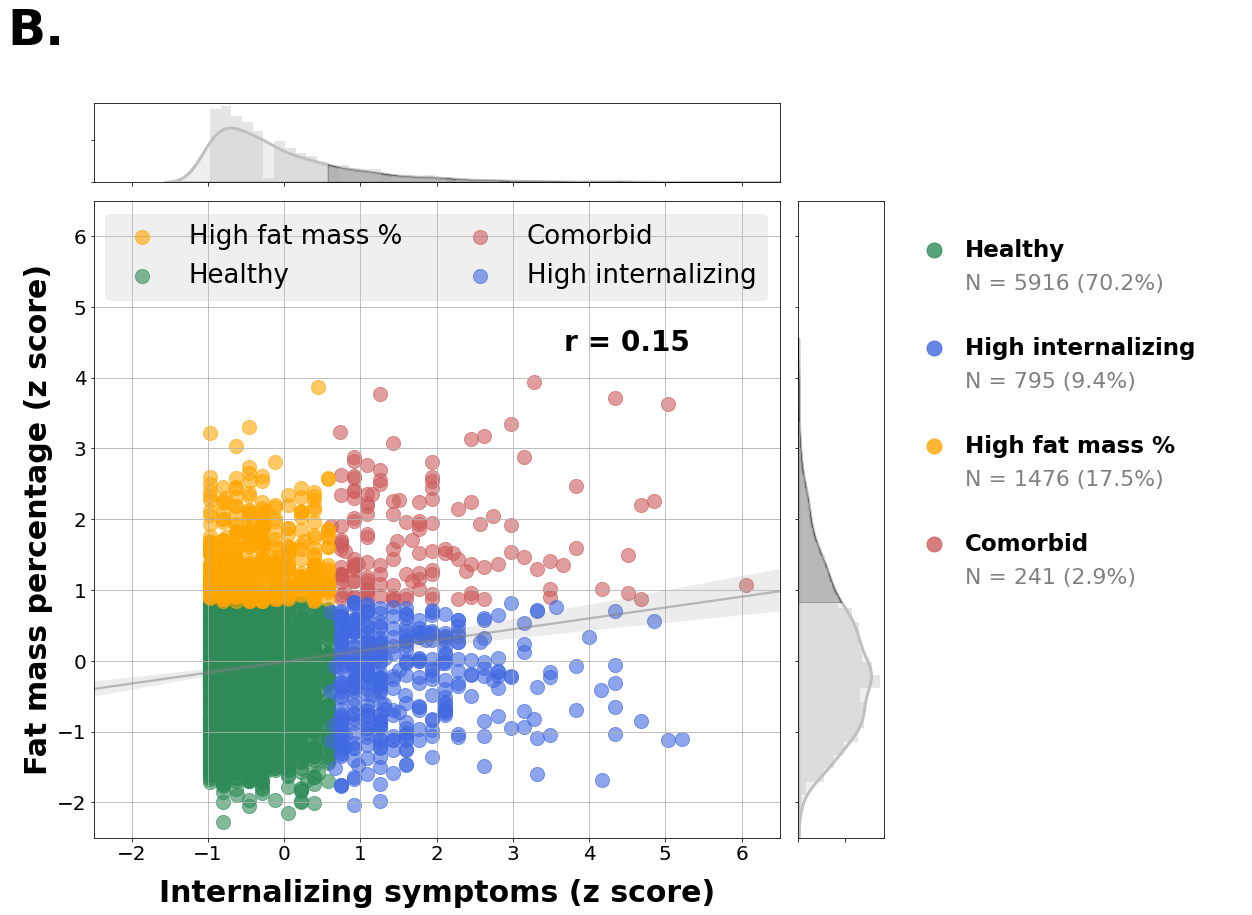

In [6]:
f = plt.figure(figsize=(20,20))

# Add a gridspec with 3 rows and 3 columns and a ratio of 1 to 8 to 4 between the size of the marginal and main axes.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(3, 3,  width_ratios=(8, 1, 4), height_ratios=(1, 8, 5),
                      left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.05, hspace = 0.05)
ax       = f.add_subplot(gs[1, 0]) # Main scatterplot ax
ax_histx = f.add_subplot(gs[0, 0], sharex = ax) # Histograms axes
ax_histy = f.add_subplot(gs[1, 1], sharey = ax) # Histograms axes
ax_pie   = f.add_subplot(gs[1, 2]) # Pie axes

cnt = Acount if cohort == 'ALSPAC' else Rcount

group_scatter(data=ogs, ax=ax, ax_histx=ax_histx, ax_histy=ax_histy, ax_pie=ax_pie, count = cnt)

n = 'B'if cohort == 'ALSPAC' else 'A'
f.text(0.04, 0.94, n+'.', size=50, weight='bold')

save_figure(output_fig3AB)

In [ ]:
f = plt.figure(figsize=(20,30))

# Add a gridspec with 3 rows and 3 columns and a ratio of 1 to 8 to 4 between the size of the marginal and main axes.
# Also adjust the subplot parameters for a square plot.
gs = f.add_gridspec(5, 3,  width_ratios=(8, 1, 4), height_ratios=(1, 8, 1.5, 1, 8),
                      left = 0.1, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.05, hspace = 0.05)

ax1       = f.add_subplot(gs[1, 0]) # Main scatterplot ax
ax2       = f.add_subplot(gs[4, 0]) # Main scatterplot ax

ax_histx1 = f.add_subplot(gs[0, 0], sharex = ax2) # Histograms axes
ax_histy1 = f.add_subplot(gs[1, 1], sharey = ax1) # Histograms axes
ax_pie1   = f.add_subplot(gs[1, 2]) # Pie axes

ax_histx2 = f.add_subplot(gs[3, 0], sharex = ax2) # Histograms axes
ax_histy2 = f.add_subplot(gs[4, 1], sharey = ax2) # Histograms axes
ax_pie2   = f.add_subplot(gs[4, 2]) # Pie axes

group_scatter(data=g, ax=ax1, ax_histx=ax_histx1, ax_histy=ax_histy1, ax_pie=ax_pie1, count = [874, 202, 261,100])
group_scatter(data=b, ax=ax2, ax_histx=ax_histx2, ax_histy=ax_histy2, ax_pie=ax_pie2, count = [971, 179, 122,40])

ax_histx1.set_title(cohort+" girls", fontsize=40, fontweight='bold')
ax_histx2.set_title(cohort+" boys",  fontsize=40, fontweight='bold')

save_figure(output_figSex)

### STRESS BY GROUP

In [ ]:
# # To build the cloudrain plot we need to stacck pre and postnatal stress in long format 
# stack = pd.concat([ogs['prenatal_stress_z'], ogs['postnatal_stress_z']], axis=0).to_frame()
# stack.columns = ['stress'] # rename column
# stack['Period'] = ['Prenatal']*ogs.shape[0] + ['Postnatal']*ogs.shape[0] # add column to specify period 
# stack['groups'] = pd.concat([ogs["risk_groups_perc"], ogs["risk_groups_perc"]], axis=0) # add column with group codes
# stack['sex'] = pd.concat([ogs['sex'], ogs['sex']], axis=0)
# stack['age'] = pd.concat([ogs['age_child'], ogs['age_child']], axis=0)

# ===================================================================================================================
# f, ax = plt.subplots(figsize=(10, 10))

# ax = sns.violinplot(x="stress", y="groups", hue="Period", data=stack, split=True, orient = "h", col="sex",
#                     scale='count', cut=0, width=0.9, inner='quartile',linewidth=2,
#                     order = ["healthy", "cardiometabolic_only", "internalizing_only", "multimorbid"],
#                     bw = .15, palette=[p1,p2])
# for l in range(8):
#     ax.collections[l].set_edgecolor(None)
    
# # adjust size tick labels 
# ax.set_yticklabels(['Healthy', 'High \nFat mass %', 'High \nInternalizing', 'Comorbid'], fontsize = 14, fontweight = 'bold')
# ax.set_xticklabels(list(range(-2, 7)), fontsize = 14)
# # adjust axis labels
# ax.set_ylabel(""); 
# ax.set_xlabel("Cumulative stress (z-score)", fontsize = 17, fontweight = 'bold', labelpad=10); 

# ax.legend(fontsize = 20)

# # ------------------------- OR [95%CI] ---------------------------- #
# if cohort == 'ALSPAC':
#     a = ALSP_groups_add.loc[['prenatal_stress_z','postnatal_stress_z']].sort_values(by='y.level')
# else:
#     a = GENR_groups_add.loc[['prenatal_stress_z','postnatal_stress_z']].sort_values(by='y.level')

# ors = list()
# for i in [4,5,0,1,2,3]:
#     eff = str(round(a.OR[i],2))+' [%.2f'%round(a.lci[i],2)+'; %.2f]'%round(a.uci[i],2)
#     ors.append(eff)
# pos = [0.9, 1.2, 1.9, 2.2, 2.9, 3.2]
# col = [p1,p2,p1,p2,p1,p2]
# for i in range(len(ors)):
#     ax.text(3.3, pos[i],'OR = %s'%ors[i], fontsize=15, fontweight='bold', color = col[i])
# ax.set_title(cohort, fontsize = 35, fontweight = 'bold')